# 3. Introduction to machine learning (2 1/2 weeks)

# Session 3.3: Support Vector Machine (SVM)
* More information about SVM algorithm and "how to" can be found in sklearn: https://scikit-learn.org/stable/modules/svm.html <br>
* Contents in this note book are from: <br>
    1. https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
    2. https://www.newtechdojo.com/learn-support-vector-machine-using-excel/

### 3.3.1 What is SVM?
* SVM stands for Support Vector Machine. Vladimir N. Vapnik and Alexey Ya. Chervonenkis invented the SVM. <br>

* The main philosophy behind SVM is finding optimal plane by maximizing the margin. A margin is a distance between nearest data points of two different classes. Moreover, in SVM, each datum is represented as a vector and the data which are nearest data points of different class are called support vectors (In Fig 2, two rectangles and a circle which have a color filled in them, are support vectors). They are called so as they virtually support the optimal plane. <br>

* To elaborate, let’s observe two graphs in Fig 1 and Fig 2. In Fig 1, we see that there are many possible planes that can separate our data into two classes. But these planes are not optimum and doesn’t work well for all examples. So we find the optimal plane by maximizing margin. The margin is maximized when its length is equal to a distance between the supports vectors. And when we get our margin maximized, we also get a plane that optimally divides the classes into two groups. In other words, those vectors are like a pillar which supports the optimal plane or say the optimal plane stands on their support. The optimal plane isn’t affected by any other vectors except those support vectors. To conclude, the whole approach is named after these vectors and it seems quite fair for they play a quite influential role.

<img src="SVM_img.png">

### 3.3.1 Classification of flowers based on the sepal properties

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics

In [15]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [16]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0.1).fit(X, y)

In [17]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

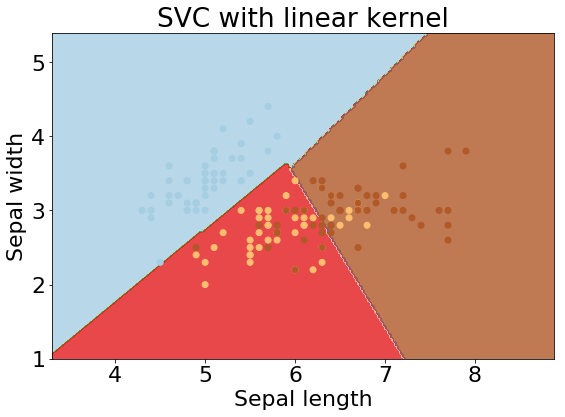

In [18]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')


plt.show()

In [19]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0.5).fit(X, y)

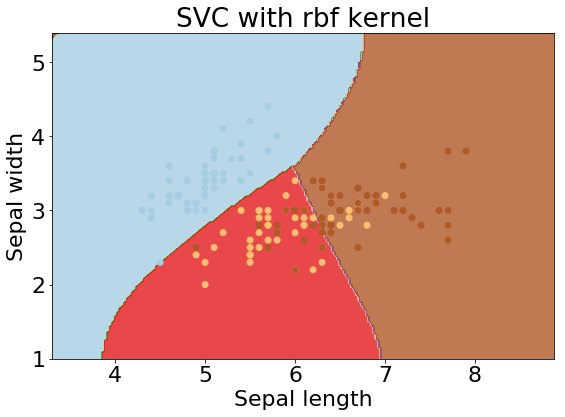

In [20]:
plt.figure(figsize=(9,6))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

In [21]:
svc = svm.SVC(kernel='rbf', C=1,gamma=15).fit(X, y)

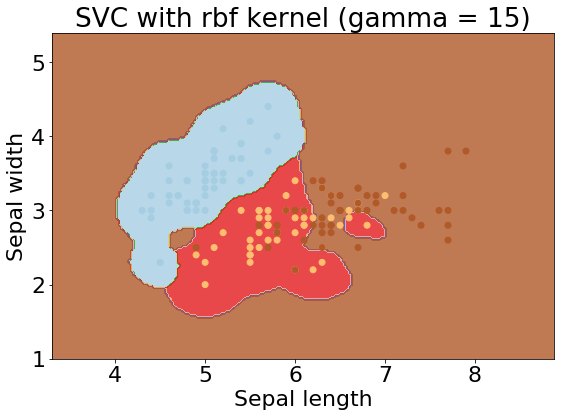

In [22]:
plt.figure(figsize=(9,6))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel (gamma = 15)')
plt.show()

In [23]:
svc = svm.SVC(kernel='rbf', C=1,gamma=100).fit(X, y)

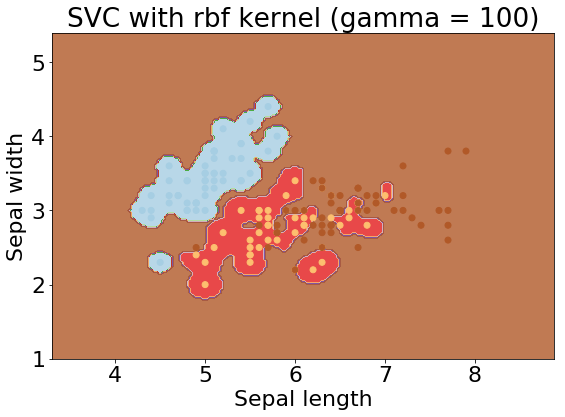

In [24]:
plt.figure(figsize=(9,6))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel (gamma = 100)')
plt.show()

### <font color='red'>Exercise 3.3</font> <br>

Go through the following SVM implimentation for the classification of hand written digits. <br>
The code is available at : https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

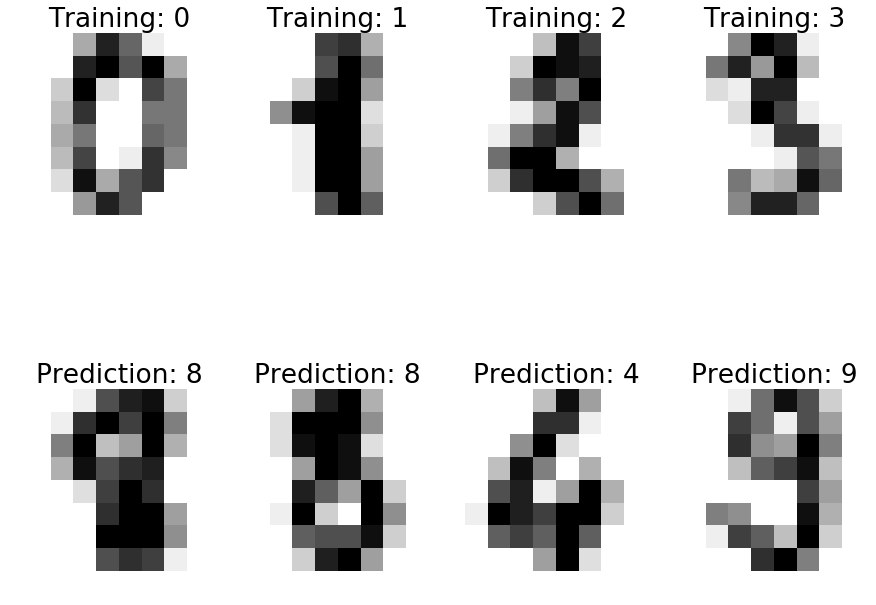

In [30]:
plt.figure(figsize=(15,12))

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
#import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print "\n ======================================================================================================= \n"

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
print " ======================================================================================================= \n"